# VIPERS SHAM Project

This notebook is part of the VIPERS-SHAM project:
http://arxiv.org/abs/xxxxxxx

Copyright 2019 by Ben Granett, granett@gmail.com
All rights reserved.
This file is released under the "MIT License Agreement". Please see the LICENSE
file that should have been included as part of this package.

In [1]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
plt.style.use('small.style')
from matplotlib import colors,cm,ticker,transforms
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter, MultipleLocator

import numpy as np

from scipy import interpolate

import load

In [2]:
def get_amp(r, wp, rmin=1, rmax=10):
    """ """
    f = interpolate.interp1d(r, r**.7*wp)
    return f(1)

In [3]:
redshifts = {'sdss':.06, 'L1':0.6, 'L2':0.7, 'L3':0.8, 'L4':0.9}
nbar = {'sdss':5.3, 'L1':11.8, 'L2':8.57, 'L3':4.79, 'L4':2.13}

In [4]:
data = {}
for sample in ['sdss','L1','L2','L3','L4']:
    n = nbar[sample]
    sham = load.load_sham(sample=sample, template="../data/sham400/nz_{sample}/wp_snap{snapshot:7.5f}.txt")
    snapshots = sham.keys()
    snapshots.sort()
    for key in snapshots:
        r, wp = sham[key]
        a = get_amp(r,wp)
        if not key in data:
            data[key] = []
        data[key].append((n, a))

fit 0.442 [-0.30811418  2.01048026] 0.014920510859276481 0.26606437684869944
fit 0.5 [-0.29177128  2.01065979] 0.014134722222032159 0.27867147276368764
fit 0.53 [-0.280956  2.014661] 0.013614363904730697 0.2876851481464655
fit 0.5563 [-0.26235665  2.01293576] 0.012718846990177557 0.30461163352993514
fit 0.5864 [-0.24566402  2.01361021] 0.011914442241658274 0.3215670511161167
fit 0.6223 [-0.23793498  2.02420695] 0.011541763700649632 0.33006351568620274
fit 0.6643 [-0.22132372  2.0332771 ] 0.010740326858727944 0.3499051420724014
fit 0.7124 [-0.20801937  2.04485376] 0.010097968699593007 0.36756596636570793
fit 0.7724 [-0.18144492  2.04839508] 0.008813657218454507 0.4086128372123291
fit 0.8324 [-0.16328852  2.05974922] 0.007935222376741269 0.44216488391992015
fit 0.9074 [-0.13577672  2.06783423] 0.006602674222448757 0.5043883485379563
fit 1.0 [-0.13036429  2.09100041] 0.006340309985146675 0.5186239471046072


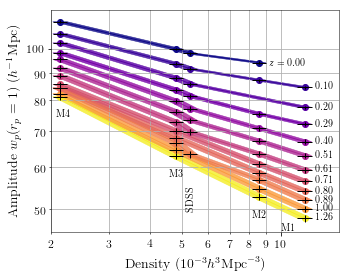

In [5]:
plt.figure(figsize=(5,4))

sm = cm.ScalarMappable(colors.Normalize(0.,1.3), 'plasma')
sm._A = []

keys = data.keys()
keys.sort()
for key in keys:
    z = 1./key - 1
    c=sm.to_rgba(z)
    
    
    x,y = np.transpose(data[key])
    o = x.argsort()
    x = x[o]
    y = y[o]
    
    logx = np.log10(x)
    logy = np.log10(y)
    fit = np.polyfit(logx, logy, 1)
    print "fit", key, fit, 1 - 1.05**fit[0], 1 - 10**(np.log10(1.1)/fit[0])
    
    erry = 1 - 1.05**fit[0]
    
    
    plt.loglog(x,y, "o-", c=c, zorder=9)
    x0 = x*0.95
    x1 = x*1.05
    xx = np.concatenate([x0,x1[::-1]])
    yy = np.concatenate([y,y[::-1]])
    plt.fill(xx,yy,c=c,alpha=0.8,zorder=0)
    plt.errorbar(x,y,xerr=x*.05,yerr=y*erry, c='k',ls='None',zorder=10)
    label = "%3.2f"%z
    if z==0:
        label = "$z = %3.2f$"%z
    plt.text(x1[-1]*1.02,y[-1], label, va='center', fontsize=10)
#     break
plt.grid(which='both')
plt.xlim(2,15)
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%i'))
ax.yaxis.set_minor_formatter(FormatStrFormatter('%i'))
ax.xaxis.set_minor_formatter(FormatStrFormatter('%i'))

plt.ylabel("Amplitude  $w_p(r_p=1)\ (h^{-1}{\\rm Mpc})$")
plt.xlabel("Density ($10^{-3} h^{3}{\\rm Mpc}^{-3}$)")


plt.text(nbar['L4']*1.02, 75, 'M4', ha='center', va='center')
plt.text(nbar['L3'], 58, 'M3', ha='center', va='center')
plt.text(nbar['L2'], 48.5, 'M2', ha='center', va='center')
plt.text(10.5, 46, 'M1', ha='center', va='center')
plt.text(nbar['sdss'], 52, 'SDSS',  ha='center', va='center', rotation=90)

plt.subplots_adjust(bottom=0.18)

plt.savefig("../figs/fig5.pdf")